<a href="https://colab.research.google.com/github/financieras/bigdata/blob/main/videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Analizar la ubicación de las ofertas de trabajo

In [1]:
!git clone https://github.com/financieras/bigdata.git

fatal: destination path 'bigdata' already exists and is not an empty directory.


In [2]:
import pandas as pd

pth = "bigdata/dataset_reto_original.csv"
df = pd.read_csv(pth)

In [3]:
df.shape        # nos da las dimensiones de la tabla

(5423, 7)

In [4]:
df.head()       # mustra las cinco primeras filas de la tabla

,Jobtitle,City,Date,Skills,Salary,Candidates,Copy
0,desarrollador/a php-moodl,Madrid,2022-09-30,"['php', 'lms', 'moodle', 'mysql']",31500.0,7,2022-10-02
1,analista programador spark/scala,Madrid,2022-09-30,"['scala', 'spark']",31500.0,0,2022-10-02
2,desarrollador de android,Madrid,2022-10-02,['android'],no disponible,2,2022-10-02
3,administrador/a microsoft azure - remoto,Online,2022-10-02,"['hyper v', 'azure', 'itil', 'mcafee', 'o365']",31500.0,22,2022-10-02
4,hardware test engineer (automoción),Tarragona,2022-10-02,"['python', 'testing']",no disponible,2,2022-10-02


In [5]:
df['Salary'].value_counts()

Salary
no disponible        3679
31500.0               112
34500.0               111
33000.0               111
39000.0               101
                     ... 
5407.200000000001       1
5170.799999999999       1
7500.0                  1
10800.0                 1
68000.0                 1
Name: count, Length: 83, dtype: int64

In [6]:
df['Copy'].value_counts()

Copy
2022-11-27    2690
2022-11-13     395
2022-11-20     385
2022-10-16     369
2022-10-23     351
2022-10-02     326
2022-11-06     326
2022-10-30     291
2022-10-09     290
Name: count, dtype: int64

In [7]:
df['Jobtitle'].value_counts()[df['Jobtitle'].value_counts() == 9]

Jobtitle
it business analys    9
devops engi           9
frontend develop      9
Name: count, dtype: int64

In [8]:
df[df['Jobtitle'] == "analista programador xamarin for android"]

,Jobtitle,City,Date,Skills,Salary,Candidates,Copy
4228,analista programador xamarin for android,Madrid,2022-09-30,"['android', 'xamarin']",36000.0,13,2022-11-27


In [9]:
df = df.drop_duplicates(['Jobtitle', 'City', 'Skills'], keep="last")
print(len(df))
df.Copy.value_counts()

5423


Copy
2022-11-27    2690
2022-11-13     395
2022-11-20     385
2022-10-16     369
2022-10-23     351
2022-10-02     326
2022-11-06     326
2022-10-30     291
2022-10-09     290
Name: count, dtype: int64

In [10]:
pth = "bigdata/dataset_reto.csv"
df.to_csv(pth, index=False)

## Task 1.1
Crea un gráfico tipo barplot que muestre los lugares con más ofertas de trabajo.

<Axes: ylabel='City'>

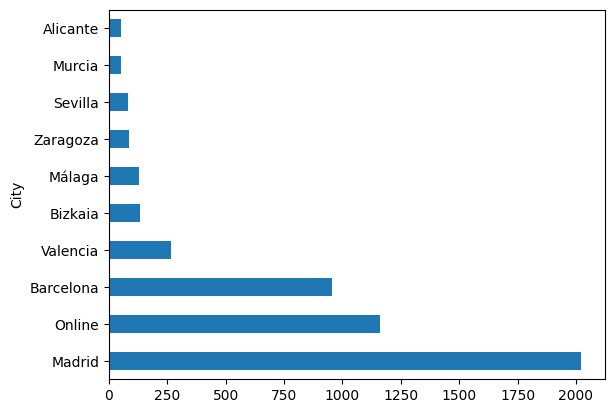

In [11]:
df["City"].value_counts()[:10].plot.barh()

#### Solución alternativa

<Axes: ylabel='City'>

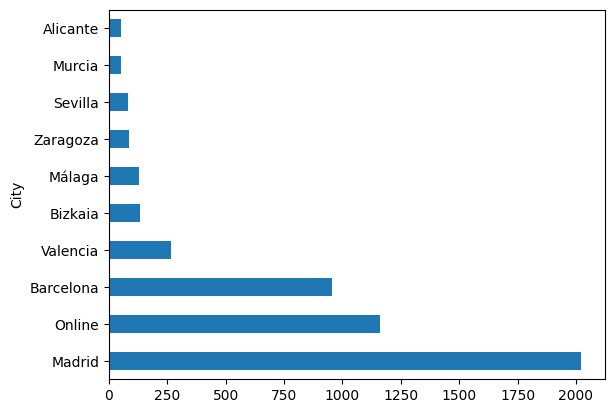

In [12]:
df.groupby('City').size().sort_values(ascending=False)[:10].plot.barh()

In [13]:
df['City'].value_counts(normalize=True)[:10] * 100

City
Madrid       37.304075
Online       21.390374
Barcelona    17.591739
Valencia      4.923474
Bizkaia       2.434077
Málaga        2.397197
Zaragoza      1.567398
Sevilla       1.493638
Murcia        0.977319
Alicante      0.940439
Name: proportion, dtype: float64

## Task 1.2
Veamos la media de candidatos inscritos en cada una de las ciudades.

**Pregunta**  
¿Cuál es la ciudad entre los 10 ciudades con más anuncios con la media de candidatos más baja?

Tip  
Busca en internet: pandas groupby with aggregation.

* Veamos la media de candidatos para cada una de estas ciudades.
* Craremos una tabla que contiene para cada ciudad el número de anuncios y la media de candidatos inscritos en los anuncios de esa ciudad.

In [14]:
df_res = df.groupby('City')['Candidates'].agg(['count', 'mean']).sort_values("count", ascending = False)
df_res[:10]

,count,mean
City,,
Madrid,2023,17.630252
Online,1160,44.007759
Barcelona,954,22.057652
Valencia,267,32.265918
Bizkaia,132,10.143939
Málaga,130,13.915385
Zaragoza,85,8.976471
Sevilla,81,20.580247
Murcia,53,53.245283


#### Solución alternativa

In [15]:
df_res = pd.DataFrame(columns = ["City", "Count", "Cand_aver"])
for city in df["City"].value_counts().index[:10]:
    df_city = df[df["City"] == city]
    count = len(df_city.index)
    mean_cand = df_city["Candidates"].mean()
    df_res.loc[len(df_res.index)] = [city, count, int(round(mean_cand, 0))]

df_res.sort_values(by=["Cand_aver"], ascending=True)

,City,Count,Cand_aver
6,Zaragoza,85,9
4,Bizkaia,132,10
5,Málaga,130,14
0,Madrid,2023,18
7,Sevilla,81,21
2,Barcelona,954,22
9,Alicante,51,22
3,Valencia,267,32
1,Online,1160,44
8,Murcia,53,53


## Task 1.3
Nos interesa ver, con una visualización, las ciudades que tienen muchos candidatos y al mismo tiempo un promedio de demandantes muy bajo.

* Tips
    1. Search: Create scatterplot with matplotlib
    2 .Search: Draw horizontal y vertical line with matplotlib
    3. Search: Add textlabels to scatterplot with matplotlib

* Pregunta
¿Cuál es la ciudad con las peores oportunidades, la que se encuentra más en la esquina derecha abajo?


* Crear un scatterplot para las 10 ciudades con más ofertas:
    - eje X: media de candidatos
    - eje Y: número de anuncios
* Divide la tabla en 4 sectores, dubujando una línea punteada horizontal en el valor medio de las ofertas y otra vertical en la media de los candidatos.

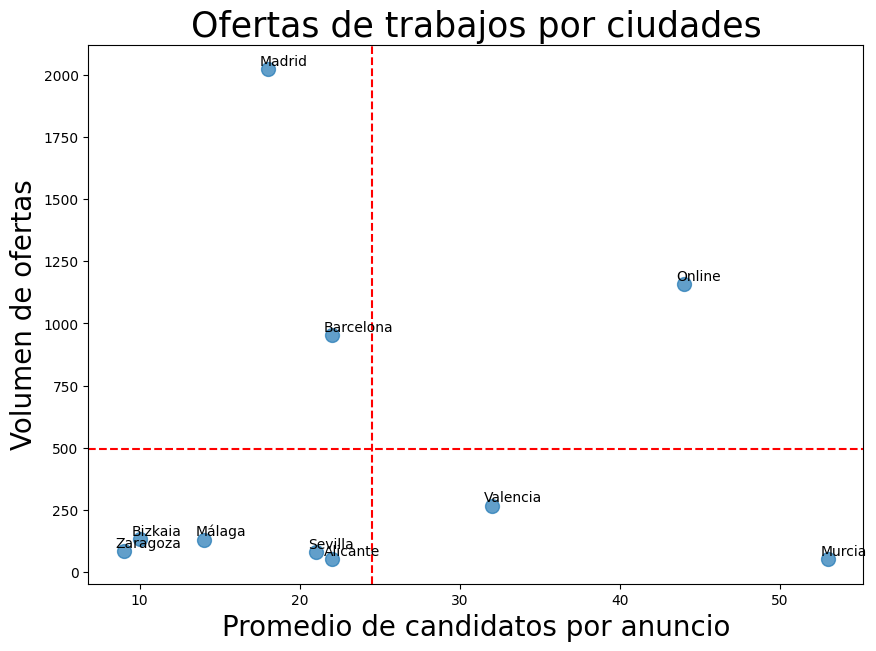

In [16]:
import matplotlib.pyplot as plt

df_plot = df_res.copy()
fig = plt.figure(figsize=(10,7))

selection = df["City"].value_counts().index[:10]
df_plot.set_index("City", inplace = True)
df_s = df_plot.loc[selection]

plt.axvline(x=df_s.Cand_aver.mean(), color='red', linestyle='--')
plt.axhline(y=df_s.Count.mean(), color='red', linestyle='--')

plt.scatter(df_s.Cand_aver, df_s.Count, s=100, alpha=0.7)
plt.title("Ofertas de trabajos por ciudades", size=25)
plt.xlabel("Promedio de candidatos por anuncio", size=20)
plt.ylabel("Volumen de ofertas", size=20)
for i in range(len(df_s.index)):
    plt.text(x=df_s.Cand_aver[i]-0.5, y=df_s.Count[i]+15, s=selection[i], size=10)
plt.savefig("bigdata/cuadrante_ciudad.png")
plt.show()

# Task 2
Analizar las tecnologías y competencias demandadas en las ofertas de trabajo.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pth = "bigdata/dataset_reto.csv"
df = pd.read_csv(pth)

## Task 2.1
¿En cuántos anuncios se piden conocimientos de  Python?

* Tips
    1. Search:  pandas convert comma separated string to list
    2. Search: use string methods for dataframe columns
    3. Search: convert  list of lists in flat list

In [18]:
df["Skills"].value_counts()[:20]

Skills
['sap']                            144
['java']                            74
['java', 'spring']                  70
['.net']                            61
['c#', '.net']                      38
['angularjs']                       37
['marketing']                       32
['ciberseguridad']                  28
['reactjs']                         27
['python']                          24
['cplusplus', 'c']                  20
['soporte', 'microinformatica']     20
['cplusplus']                       20
['dynamics']                        19
['java', 'microservicios']          19
['linux', 'windows']                18
['helpdesk']                        18
['php', 'laravel']                  18
['abap', 'sap']                     17
['oracle']                          16
Name: count, dtype: int64

In [19]:
type(df.Skills[0])

str

In [20]:
df["skill_list"] = df["Skills"].str.split(",")
print(type(df.skill_list[0]))
print(df.skill_list[0])
print(df.skill_list[0][0])

<class 'list'>
["['php'", " 'lms'", " 'moodle'", " 'mysql']"]
['php'


In [21]:
'''df["skill_list"] = df["Skills"].str.strip("[]").str.replace(" ","").str.replace("'","").str.split(",")
print(type(df.skill_list[0]))
print(df.skill_list[0])
print(df.skill_list[0][0])'''

'df["skill_list"] = df["Skills"].str.strip("[]").str.replace(" ","").str.replace("\'","").str.split(",")\nprint(type(df.skill_list[0]))\nprint(df.skill_list[0])\nprint(df.skill_list[0][0])'

#### Solución alternativa

In [22]:
df["skill_list"] = df["Skills"]. apply(lambda x: x[1:-1].replace(" ","").replace("'","").split(","))
print(type(df.skill_list[0]))
print(df.skill_list[31])
print(df.skill_list[0][0])

<class 'list'>
['oracle', 'access', 'sqlserver', 'mysql']
php


17512


<Axes: >

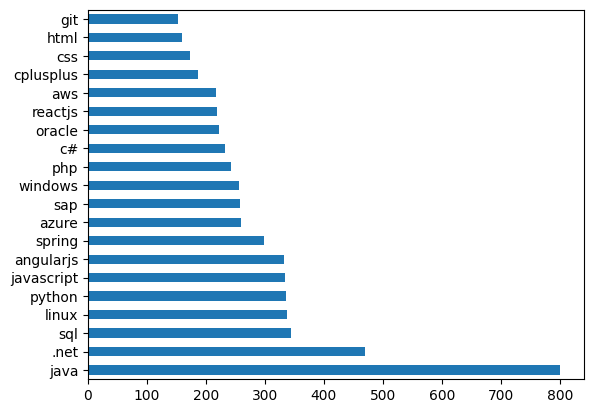

In [23]:
flat_list = [item for sublist in df["skill_list"] for item in sublist]
print(len(flat_list))
pd.Series(flat_list).value_counts()[:20].plot.barh()

### Otra solución alternativa

In [24]:
df["skill_list"].explode().value_counts()[:25]

skill_list
java          801
.net          469
sql           345
linux         338
python        336
javascript    334
angularjs     333
spring        298
azure         259
sap           258
windows       256
php           243
c#            233
oracle        222
reactjs       219
aws           217
cplusplus     187
css           173
html          160
git           152
nodejs        140
sqlserver     129
redes         127
jira          117
docker        115
Name: count, dtype: int64

## Task 2.2
* Pregunta:
    - ¿Cuál de las 50 tecnologías más demandas ofrece la mejor relación entre candidatos y ofertas?

* Tip
    - Search: pandas find string in column

* Crea una tabla que contiene para las 15 tecnologías con más anuncios el número de anuncios que demandan estas tecnologías y la media de candidatos inscritos en estos anuncios.

In [25]:
skills_list_2D = df["skill_list"].to_list()

new_list_2D = []
for list_of_skills in skills_list_2D:
    new_list = []
    for skill in list_of_skills:
        skill = "#" + str(skill) + "#"
        new_list.append(skill)
    new_list_2D.append(str(new_list))
df["#Skill#"] = new_list_2D

item ="#c##"
print(item[1:-1], len(df[df["#Skill#"].str.contains(item)]))

c# 233


In [26]:
df_res_hashtag = pd.DataFrame(columns = ["Skill", "Count", "Cand_mean"])
for skill in df["skill_list"].explode().value_counts().index[:50]:
    skill = "#" + str(skill) + "#"
    df_skill = df[df["#Skill#"].str.contains(skill)]
    count = len(df_skill.index)
    mean_cand = int(df_skill["Candidates"].mean())
    df_res_hashtag.loc[len(df_res_hashtag.index)] = [skill[1:-1], count, mean_cand]

df_res_hashtag.sort_values(by=["Count"], ascending=False, ignore_index=True, inplace=True)
df_res_hashtag.head()

,Skill,Count,Cand_mean
0,java,801,33
1,.net,469,25
2,sql,345,26
3,linux,338,33
4,python,336,28


In [27]:
df_res_hashtag.sort_values("Cand_mean", ascending=True).head()

,Skill,Count,Cand_mean
10,sap,258,9
31,cloud,109,12
33,kubernetes,102,13
44,data,74,13
17,cplusplus,187,14


#### Solución alternativa

In [28]:
matriz = pd.DataFrame()
for skill in df["skill_list"].explode().value_counts().index[:50]:
    df_skill = pd.DataFrame()
    df_skill[skill] = [1 if skill in list_of_skills else 0 for list_of_skills in df["skill_list"]]
    matriz = pd.concat([matriz, df_skill], axis=1)

df_con_matriz = pd.concat([df, matriz], axis=1)
print(len(df_con_matriz.columns))

59


In [29]:
df_res_matriz = pd.DataFrame(columns = ["Skill", "Count", "Cand_mean"])
for skill in df["skill_list"].explode().value_counts().index[:50]:
    df_skill = df_con_matriz[df_con_matriz[skill] == 1]
    count = len(df_skill.index)
    mean_cand = df_skill["Candidates"].mean()
    df_res_matriz.loc[len(df_res_matriz.index)] = [skill, count, int(mean_cand)]

df_res_matriz.sort_values(by=["Count"], ascending=False, ignore_index=True, inplace=True)
df_res_matriz[:10]

,Skill,Count,Cand_mean
0,java,801,33
1,.net,469,25
2,sql,345,26
3,linux,338,33
4,python,336,28
5,javascript,334,49
6,angularjs,333,33
7,spring,298,22
8,azure,259,20
9,sap,258,9


#### Otra solución alternativa

In [30]:
'''df_res = pd.DataFrame(columns = ["Skill", "Count", "Cand_mean"])
for skill in df["skill_list"].explode().value_counts().index[:50]:
    skill = [skill]
    df_skill = df[pd.DataFrame(df.skill_list.tolist()).isin(skill).any(1).values]
    count = len(df_skill.index)
    mean_cand = int(df_skill["Candidates"].mean())
    df_res.loc[len(df_res.index)] = [skill, count, mean_cand]

df_res.sort_values(by=["Count"], ascending=False, ignore_index=True, inplace=True)
df_res.head(5)'''

'df_res = pd.DataFrame(columns = ["Skill", "Count", "Cand_mean"])\nfor skill in df["skill_list"].explode().value_counts().index[:50]:\n    skill = [skill]\n    df_skill = df[pd.DataFrame(df.skill_list.tolist()).isin(skill).any(1).values]\n    count = len(df_skill.index)\n    mean_cand = int(df_skill["Candidates"].mean())\n    df_res.loc[len(df_res.index)] = [skill, count, mean_cand]\n\ndf_res.sort_values(by=["Count"], ascending=False, ignore_index=True, inplace=True)\ndf_res.head(5)'

## Task 2.3
¿Qué tecnologías aparecen en el cuadrante con más anuncios y menos candidatos?


* Crear un scatterplot para los 20 tecnologías con más ofertas, con la media de candidatos en el eje x, y el número de anuncios en el eje y. Divide la tabla en 4 sectores, dibujando una línea en el valor medio de las ofertas, y la media de las medias de los candidatos.

* Se trata de hacer un gráfico parecido al de la taréa 1.3.